# Homework 2
## DSE 220: Machine Learning
## Due Date: 30 April 2017
## Orysya Stus

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## 2. Data
Download the MNIST train and test data from github along with their corresponding label files. The train and test data consist of 6000 and 1000 binarized MNIST images respectively.

In [2]:
X_train = pd.read_csv('mnist_train_data.csv', header= None)
y_train = pd.read_csv('mnist_train_labels.csv', names=['labels'])
X_test = pd.read_csv('mnist_test_data.csv', header= None)
y_test = pd.read_csv('mnist_test_labels.csv', names=['labels'])

## 3. Generative Learning
Please don't use the direct function from scikit-learn library for questions 1, 2, 3 and write your own implementation for them.

### Question 1: 
Compute and report the prior probabilities pi_j for all labels.

In [3]:
lbls = sort(y_train['labels'].unique())
lbl_cnt_lst = []
priors = []
priors_dict = {}
 
for l in lbls:
    cnt = y_train[y_train['labels'] == l].count()[0]
    lbl_cnt_lst.append(cnt)  
    tmp_prior = cnt / len (y_train)
    priors.append(tmp_prior)
   
    priors_dict[l] = tmp_prior
    print ("Count for label", l ," = " , cnt, " and Prior probabilty ", " = ", tmp_prior)
 
print ("\nChecking Sum of all priors = ", sum(priors))

Count for label 0  =  592  and Prior probabilty   =  0.0986666666667
Count for label 1  =  671  and Prior probabilty   =  0.111833333333
Count for label 2  =  581  and Prior probabilty   =  0.0968333333333
Count for label 3  =  608  and Prior probabilty   =  0.101333333333
Count for label 4  =  623  and Prior probabilty   =  0.103833333333
Count for label 5  =  514  and Prior probabilty   =  0.0856666666667
Count for label 6  =  608  and Prior probabilty   =  0.101333333333
Count for label 7  =  651  and Prior probabilty   =  0.1085
Count for label 8  =  551  and Prior probabilty   =  0.0918333333333
Count for label 9  =  601  and Prior probabilty   =  0.100166666667

Checking Sum of all priors =  1.0


In [4]:
# def prior_prob(label):
#     count = 0
#     for i in range(len(train)):
#         if train[i][-1] == label:
#             count += 1
#     return count/len(train)
# labels = arange(10)
# prior_prob_dict = {}
# for label in labels:
#     prior_prob_dict[label] = prior_prob(label)
# for i,j in prior_prob_dict.items():
#     print('The prior probability for class', i, 'is', j)

### Question 2: 
For each pixel Xi and label j, compute Pji = P(Xi = 1|y = j) (Use the maximum likelihood estimate shown in class). Use Laplacian Smoothing for computing Pji. Report the highest Pji for each label j.

In [5]:
merged_df = pd.concat([X_train, y_train ], axis = 1)
pji = np.zeros(shape=[10, 784])
 
for l in lbls:
    temp_df = merged_df.loc[merged_df['labels'] == l]
    temp_df = temp_df.drop('labels', 1)
    np_sum = (temp_df.values).sum(axis = 0)
   
    np_pr = (np_sum +1 ) / (temp_df.shape[0] + 2)
    pji[l, :] = np_pr
    print ("Highest Probability(Pji) for label", l,   " = ",np_pr.max())
 
log_pji = np.log(pji.T)

Highest Probability(Pji) for label 0  =  0.851851851852
Highest Probability(Pji) for label 1  =  0.98514115899
Highest Probability(Pji) for label 2  =  0.728987993139
Highest Probability(Pji) for label 3  =  0.808196721311
Highest Probability(Pji) for label 4  =  0.8496
Highest Probability(Pji) for label 5  =  0.711240310078
Highest Probability(Pji) for label 6  =  0.849180327869
Highest Probability(Pji) for label 7  =  0.794793261868
Highest Probability(Pji) for label 8  =  0.875226039783
Highest Probability(Pji) for label 9  =  0.867330016584


### Question 3: 
Use naive bayes (as shown in lecture slides) to classify the test data. Report the accuracy.

In [6]:
left_term = np.matmul(X_test, log_pji)
right_term = np.matmul((1 - X_test), np.log(1 - pji).T )
final = np.add(( left_term + right_term), np.log(priors))
y_predicted = np.argmax(final, axis = 1)

In [7]:
from sklearn import metrics
print('The accuracy is', metrics.accuracy_score(y_test, y_predicted))

The accuracy is 0.809


Note: You can use the scikit-learn function from Question 4 onwards

### Question 4: 
Compute the confusion matrix (as shown in the lectures) and report the top 3 pairs with most (absolute number) incorrect classifications.

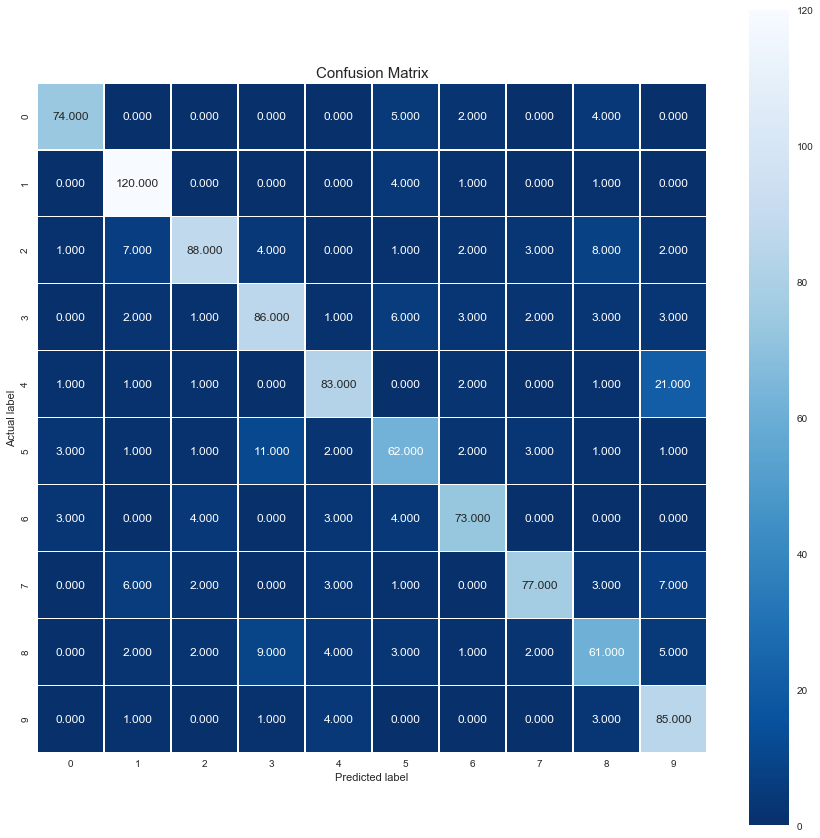

In [8]:
import seaborn as sns
cm = pd.DataFrame(metrics.confusion_matrix(y_test, y_predicted))
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".3f", linewidth=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
plt.title('Confusion Matrix', size = 15);

The top 3 pairs with the most (absolute number) incorrect classifications are:

    4 is incorrectly classified as 9 (21 times)
    5 is incorrectly classified as 3 (11 times)
    8 is incorrectly classified as 3 (9 times)

### Question 5: 
Visualizing mistakes: Print two MNIST images from the test data that your classier misclassified. Write both the true and predicted labels for both of these misclassied digits.

For this random example the model predicted a:  1
Let's see how it compares to the actual image:  2


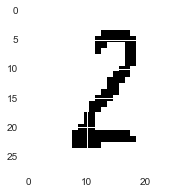

For this random example the model predicted a:  4
Let's see how it compares to the actual image:  8


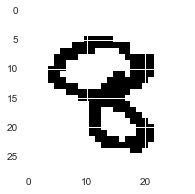

In [9]:
X_test = np.array(X_test)
y_test = np.array(y_test['labels'])
indices = np.array(np.where((y_test !=  y_predicted) == True))[0]
wrong = random.choice(indices, 2)
actuals = y_test[wrong]
left_term = np.matmul(X_test[wrong], log_pji)
right_term = np.matmul((1 - X_test[wrong]), np.log(1 - pji).T )
final = np.add(( left_term + right_term), np.log(priors))
y_predicted = np.argmax(final, axis = 1)

for i in range(len(wrong)):
    print("For this random example the model predicted a: ", y_predicted[i])
    print("Let's see how it compares to the actual image: ", actuals[i])
    plt.figure(1, figsize=(3,3))
    plt.imshow(X_test[wrong[i]].reshape(28, 28), cmap=plt.cm.gray_r, interpolation='nearest')
    plt.show()

Now, we will implement Gaussian Mixture Model and Linear Discriminant Analysis on the breast cancer data (sklearn.datasets.load breast cancer) available in sklean.datasets. Load the data and split it into train-validation-test (40-20-40 split). Don't shuffle the data, otherwise your results will be different.

In [45]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
bc = load_breast_cancer()
X, X_test, y, y_test = train_test_split(bc.data, bc.target, test_size=0.4, random_state= 5)
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.33, random_state= 5)
# X_train = bc.data[:228]
# y_train = bc.target[:228]
# X_valid = bc.data[228:341]
# y_valid = bc.target[228:341]
# X_test = bc.data[341:]
# y_test = bc.target[341:]
print('Train', y_train.shape, 'Valid', y_valid.shape, 'Test', y_test.shape)

Train (228,) Valid (113,) Test (228,)


### Question 6: 
Implement Gaussian Mixture model on the data as shown in class. Tune the covariance type parameter on the validation data. Use the selected value to compute the test accuracy. As always, train the model on train+validation data to compute the test accuracy.

In [46]:
from sklearn.mixture import GaussianMixture
best_acc = 0
for i in ['spherical', 'tied', 'diag', 'full']:
    clf = GaussianMixture(n_components=2, covariance_type = i)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_valid)
    accuracy = np.sum(y_pred == y_valid)*1.0/len(y_valid)
    print('For criterion =', i, 'the validation accuracy = ' + str(accuracy))
    if (accuracy > best_acc):
        best_ct = i
        best_acc = accuracy
print('The best criterion is', best_ct, 'with a validation accuracy of', best_acc)

For criterion = spherical the validation accuracy = 0.115044247788
For criterion = tied the validation accuracy = 0.212389380531
For criterion = diag the validation accuracy = 0.902654867257
For criterion = full the validation accuracy = 0.16814159292
The best criterion is diag with a validation accuracy of 0.902654867257


In [47]:
from sklearn.metrics import accuracy_score
X_train_total = np.concatenate((X_train,X_valid))
y_train_total = np.concatenate((y_train,y_valid))
clf = GaussianMixture(n_components=2, covariance_type = best_ct)
clf.fit(X_train_total, y_train_total)
y_pred = clf.predict(X_test)
print('The test accuracy using criterion =', best_ct, 'is ', accuracy_score(y_test, y_pred))

The test accuracy using criterion = diag is  0.0833333333333


### Question 7: 
Apply Linear Discriminant Analysis model on the train+validation data and report the accuracy obtained on test data. Report the transformation matrix (w) along with the intercept.

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_total, y_train_total)
y_pred = clf.predict(X_test)
print('The test accuracy = ' + str(np.sum(y_pred == y_test)/len(y_test)))

The test accuracy = 0.973684210526


In [14]:
print('The transformation matrix (w) is \n', clf.coef_)
print('\n The intercept is \n', clf.intercept_)

The transformation matrix (w) is 
 [[  5.33168485e+00  -2.12956799e-01  -6.01033070e-01  -8.89253348e-03
   -5.44754548e+01   7.43535846e+01  -4.97920818e+00  -3.41702295e+01
    1.73163730e+01  -4.44714556e+01  -8.41409536e+00  -2.52828683e-01
    5.78531220e-01   1.05895668e-02  -2.80550309e+02  -2.62778874e+00
    4.25991726e+01  -1.67347238e+02   1.26610355e+01   2.01114643e+02
   -3.54374333e+00  -7.21909964e-02  -5.53734899e-02   2.39371964e-02
    1.38875560e+01   1.03981200e+00  -6.05644948e+00  -1.47646877e+01
   -1.62743163e+01  -8.04669707e+01]]

 The intercept is 
 [ 50.95842876]


## 4. Evaluating Classifiers
### Question 8: 
Load the digits dataset (scikit-learn's toy dataset) and take the last 1300 samples as your test set. Train a K-Nearest Neighbor (k=5, linf distance) model and then without using any scikit-learn method, report the final values for Specificity, Sensitivity, TPR, TNR, FNR, FPR, Precision and Recall for Digit 3 (this digit is a positive, everything else is a negative).

In [15]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_digits
digits = load_digits()

In [16]:
print('The shape of the entire digits dataset is', digits.data.shape)
X_train = digits.data[:497]
y_train = digits.target[:497]
X_test = digits.data[497:]
y_test = digits.target[497:]

The shape of the entire digits dataset is (1797, 64)


In [17]:
clf = KNeighborsClassifier(n_neighbors=5, metric = 'chebyshev')
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [18]:
TP = sum(y_pred[y_test == 3] == 3)
FP = sum(y_pred[y_test != 3] == 3)
TN = sum(y_pred[y_test != 3] != 3)
FN = sum(y_pred[y_test == 3] != 3)

In [19]:
print('TP, FP, TN, FN', TP, FP, TN, FN)

TP, FP, TN, FN 113 13 1157 17


In [20]:
print('The specificity is', TN/(TN+FP))
print('The sensitivity is', TP/(TP+FN))
print('The TPR is', TP/(TP+FN))
print('The TNR is', TN/(TN+FP))
print('The FNR is', FN/(TP+FN))
print('The FPR is', FP/(FP+TN))
print('The precision is', TP/(TP+FP))
print('The recall is', TP/(TP+FN))

The specificity is 0.988888888889
The sensitivity is 0.869230769231
The TPR is 0.869230769231
The TNR is 0.988888888889
The FNR is 0.130769230769
The FPR is 0.0111111111111
The precision is 0.896825396825
The recall is 0.869230769231


## 5. Regression
An ablation experiment consists of removing one feature from an experiment, in order to assess the amount of additional information that feature provides above and beyond the others. For this section, we will use the diabetes dataset from scikit-learn's toy datasets. Split the data into training and testing data as a 90-10 split with random state of 10.

In [48]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size = 0.1, random_state = 10)

### Question 9: 
Perform least squares regression on this dataset. Report the mean squared error and the mean absolute error on the test data.

In [63]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print('Using sklearn.linear_model.LinearRegression: \n')
print('The mean squared error on the test data is', mean_squared_error(y_test, y_pred))
print('The mean absolute error on the test data is', mean_absolute_error(y_test, y_pred))

Using sklearn.linear_model.LinearRegression: 

The mean squared error on the test data is 2165.86619219
The mean absolute error on the test data is 36.3423540158


### Question 10: 
Repeat the experiment from Question 10 for all possible values of ablation (i.e., removing the feature 1 only, then removing the feature 2 only, and so on). Report all MSEs.

In [67]:
print('Using sklearn.linear_model.LinearRegression: \n')
for i in range(10):
    X_ablation = np.delete(diabetes.data, [i], axis=1)
    X_train, X_test, y_train, y_test = train_test_split(X_ablation, diabetes.target, test_size = 0.1, random_state = 10)
    clf = LinearRegression()
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print('After dropping feature', i, 'the mean squared error on the test data is', mean_squared_error(y_test, y_pred))

Using sklearn.linear_model.LinearRegression: 

After dropping feature 0 the mean squared error on the test data is 2152.80664218
After dropping feature 1 the mean squared error on the test data is 2259.13307937
After dropping feature 2 the mean squared error on the test data is 2783.51448185
After dropping feature 3 the mean squared error on the test data is 2424.772348
After dropping feature 4 the mean squared error on the test data is 2187.59951938
After dropping feature 5 the mean squared error on the test data is 2167.51760615
After dropping feature 6 the mean squared error on the test data is 2159.15148251
After dropping feature 7 the mean squared error on the test data is 2153.06317113
After dropping feature 8 the mean squared error on the test data is 2335.17338461
After dropping feature 9 the mean squared error on the test data is 2165.86619219


### Question 11: 
Based on the MSE values obtained from Question 10, which features do you deem the most/least signicant and why?

Using sklearn.linear_model.LinearRegression:

Feature 2 is the most significant, because removing and running the least squared linear regression results in the largest mean squared error of 2783.51448185, while feature 0 is the least significant with a mean square error of 2152.80664218.